In [271]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean
import vedo

from histalign.backend.ccf.paths import get_atlas_path
from histalign.backend.io import load_volume
from histalign.backend.maths import compute_centre
from histalign.backend.models import Resolution

vedo.settings.default_backend = "vtk"

In [272]:
def imshow(image):
    plt.imshow(image)
    plt.axis(False)
    plt.show()


def show(data):
    vedo.show(data, axes=2, interactive=False).interactive().close()


def generate_points(plane, shape):
    origin = plane.points[0]

    normal1 = (plane.points[0] - plane.points[1]) / shape[0]
    normal2 = (plane.points[3] - plane.points[1]) / shape[1]

    xi, yi = np.meshgrid(
        np.linspace(0, shape[0], shape[0], endpoint=False),
        np.linspace(0, shape[1], shape[1], endpoint=False),
    )

    points = np.vstack([xi.ravel(), yi.ravel()])
    points = np.dot(np.vstack((normal1, normal2)).T, points).T

    points = origin + points

    return vedo.Points(points)


def magnitude(v):
    return np.sqrt(np.sum(np.array(v) ** 2))

In [273]:
atlas = get_atlas_path(Resolution.MICRONS_100)
atlas = load_volume(atlas)

In [274]:
shape = (6, 6, 6)
centre = (np.array(shape) - 1) / 2
image_centre = np.hstack(
    (((np.array(shape) - 1) // 2)[0], ((np.array(shape) - 1) // 2)[1:])
)

# array = np.arange(np.prod(shape), dtype=np.uint16).reshape(shape)
array = np.random.randint(0, 255, np.prod(shape), dtype=np.uint8).reshape(shape)
# array = np.stack([np.ones(shape[1:]) + i for i in range(shape[0])])
volume = vedo.Volume(array)

In [275]:
mesh = volume.slice_plane(centre, (-1, 0, 0), mode="nearest")

In [276]:
plane = vedo.Plane(centre, (-1, 0, 0), s=np.array(shape[1:]) - 1, c="blue")

points = generate_points(plane, shape[1:])

In [277]:
points.points

array([[2.5       , 5.        , 5.        ],
       [2.5       , 5.        , 5.8333335 ],
       [2.5       , 5.        , 6.6666665 ],
       [2.5       , 5.        , 7.5       ],
       [2.5       , 5.        , 8.333333  ],
       [2.5       , 5.        , 9.166667  ],
       [2.5       , 4.1666665 , 5.        ],
       [2.5       , 4.1666665 , 5.8333335 ],
       [2.5       , 4.1666665 , 6.6666665 ],
       [2.5       , 4.1666665 , 7.5       ],
       [2.5       , 4.1666665 , 8.333333  ],
       [2.5       , 4.1666665 , 9.166667  ],
       [2.5       , 3.3333335 , 5.        ],
       [2.5       , 3.3333335 , 5.8333335 ],
       [2.5       , 3.3333335 , 6.6666665 ],
       [2.5       , 3.3333335 , 7.5       ],
       [2.5       , 3.3333335 , 8.333333  ],
       [2.5       , 3.3333335 , 9.166667  ],
       [2.5       , 2.5       , 5.        ],
       [2.5       , 2.5       , 5.8333335 ],
       [2.5       , 2.5       , 6.6666665 ],
       [2.5       , 2.5       , 7.5       ],
       [2.

In [278]:
plane.points[1]

array([2.5, 5. , 0. ], dtype=float32)

In [279]:
show(
    [
        volume,
        # mesh,
        # points,
        plane,
        # vedo.Points([[2, 2, i] for i in range(6)], r=10),
        # vedo.Point(image_centre, c="blue", r=10),
        # vedo.Point(plane.points[0], r=10),
        # vedo.Point(plane.points[1], r=10),
        # vedo.Point(plane.points[2], r=10),
        # vedo.Point(plane.points[3], r=10),
    ]
)

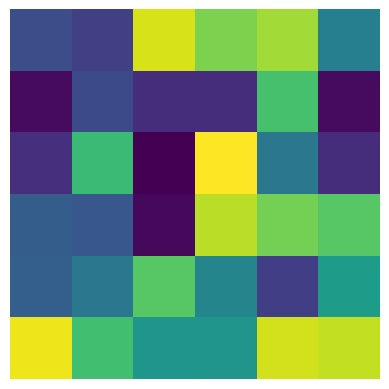

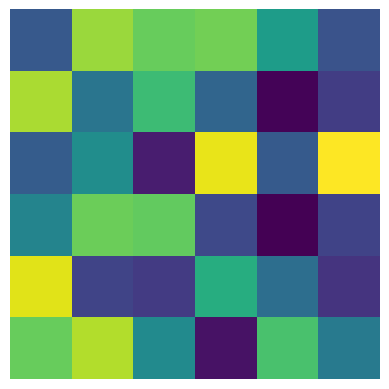

In [280]:
imshow(mesh.pointdata["ImageScalars"].reshape(mesh.metadata["shape"]))

imshow(array[(shape[0] - 1) // 2])